## Lending Club Loan Data

#### Projekt końcowy

Lending Club to firma pożyczkowa typu peer-to-peer, która łączy pożyczkobiorców z inwestorami za pośrednictwem platformy internetowej. Obsługuje osoby, które potrzebują pożyczek osobistych w wysokości od 1000 do 40 000 USD. Pożyczkobiorcy otrzymują pełną kwotę udzielonej pożyczki pomniejszoną o opłatę początkową, która jest uiszczana firmie. Inwestorzy kupują weksle zabezpieczone osobistymi pożyczkami i płacą Lending Club opłatę za usługę. Firma Lending Club udostępnia dane o wszystkich pożyczkach udzielonych za pośrednictwem swojej platformy w określonych okresach.

Na potrzeby tego projektu zostały użyte dane dotyczące pożyczek udzielonych za pośrednictwem Lending Club na przestrzeni lat 2007 -2011. Każda pożyczka jest opatrzona informacją o tym, czy ostatecznie została spłacona (Fully Paid lub Charged off w kolumnie loan_status). Twoim zadaniem jest zbudowanie modelu klasyfikacyjnego, który na podstawie tych danych będzie przewidywał z określoną dokładnością, czy potencjalny pożyczkobiorca spłaci swój dług z tytułu zaciągniętej pozyczki. Do zbioru danych dołączony jest plik z opisem wszystkich zmiennych oraz plik „FICO Score ranged.pdf”, w którym dokładnie opisano znaczenie jednej z kolumn.

Poniżej zaprezentowane są poszczególne etapy analizy, których wykonanie jest konieczne do zaliczenia projektu oraz ich punktacja:

1. Obróbka danych (Data Processing) (70pkt)

2. EDA, czyli obszerna eksploracja danych (100pkt)
 Opisz wnioski płynące z każdego wykresu, swoje hipotezy poprzyj testami statystycznymi takimi jak np. t-test lub   Chi-square. Dodatkowo odpowiedz na poniższe pytania:
 1) W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?
 2) W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO
 3) W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?
 4) W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?
 5) W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?
 6) Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?
 

3. Feature Engineering – utwórz 20 nowych zmiennych (60 pkt)


4. Modelowanie (150 pkt)

 1) Wykonaj klasteryzację danych (wypróbuj do tego celu kilka metod, min. 3) i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów (40 pkt)
 2) Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)
 3) Sprawdź działanie wcześniej użytych metod na skompresowanych danych za pomocą PCA, porównaj wyniki (AUROC score) z modelami wytrenowanymi w poprzednim podpunkcie. (20pkt)
 4) Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

## 1. Data Processing

In [92]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Uploading data

In [93]:
# Uploading the dictionary file with columns description
loan_description = pd.read_excel('./LCDataDictionary.xls').dropna()
loan_description.style.set_properties(subset=['Description'], **{'width': '10000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [94]:
# Uploading data file
loan_data = pd.read_csv('./Loan_data.csv')
loan_data

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,NaN,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42532,72998,NaN,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42533,72176,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [96]:
loan_data.shape

(42536, 151)

In [97]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,NaN,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,NaN,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,NaN,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,NaN,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,NaN,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Checking description parameters
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.00,9700.00,15000.0000,35000.00
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.00,9600.00,15000.0000,35000.00
funded_amnt_inv,42535.0,10139.938785,7131.598014,0.00,4950.00,8500.00,14000.0000,35000.00
installment,42535.0,322.623063,208.927216,15.67,165.52,277.69,428.1800,1305.19
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hardship_last_payment_amount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settlement_amount,160.0,4272.137875,3119.373774,193.29,1842.75,3499.35,5701.1000,14798.20
settlement_percentage,160.0,49.905875,15.563690,10.69,40.00,49.97,60.6525,92.74


In [99]:
loan_data.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

#### Checking missing values 

In [100]:
# Checking the null values
def missing_values_dataset(loan_data):
    mis_val = loan_data.isnull().sum()
    mis_val_percent = 100 * loan_data.isnull().sum() / len(loan_data)
    mis_val_type = loan_data.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
    
    mis_val_table_rename_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    mis_val_table_rename_columns = mis_val_table_rename_columns[ mis_val_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
    
    print ("Dataset has " + str(loan_data.shape[1]) + " columns." " \n" + "Among them " + str(mis_val_table_rename_columns.shape[0]) + " columns contain missing values.")
    
    return mis_val_table_rename_columns

In [101]:
missing_loan_data = missing_values_dataset(loan_data)
missing_loan_data

Dataset has 151 columns. 
Among them 150 columns contain missing values.


,Missing Values,% of Total Values,type
member_id,42536,100.0,float64
num_il_tl,42536,100.0,float64
mths_since_recent_revol_delinq,42536,100.0,float64
num_accts_ever_120_pd,42536,100.0,float64
num_actv_bc_tl,42536,100.0,float64
...,...,...,...
zip_code,1,0.0,object
purpose,1,0.0,object
total_rec_prncp,1,0.0,float64
url,1,0.0,object


In [102]:
# Investigating completely empty columns
empty_loan_columns = missing_loan_data.loc[missing_loan_data['Missing Values'] == 42536]
empty_loan_columns

,Missing Values,% of Total Values,type
member_id,42536,100.0,float64
num_il_tl,42536,100.0,float64
mths_since_recent_revol_delinq,42536,100.0,float64
num_accts_ever_120_pd,42536,100.0,float64
num_actv_bc_tl,42536,100.0,float64
...,...,...,...
open_act_il,42536,100.0,float64
open_il_12m,42536,100.0,float64
open_il_24m,42536,100.0,float64
mths_since_rcnt_il,42536,100.0,float64


- Based on the tables above, we can conclude that 150 columns contain missing data (NaN). The missing data are raning from ~13% (and lower) to 100% of the column. Moreover, they are 82 empty columns (with 100% of missing values) in the dataset. 
Therefore, for the purpose of further analysis, columns with more than 50% of missing data will be excluded from the dataset (cut off 50%).

In [103]:
# Dropping the columns with more that 50% of missing data
missing_fraction = loan_data.isna().mean()
drop_list = sorted(missing_fraction[missing_fraction > 0.50].index)

In [104]:
# 91 columns will be removed from the dataset
len(drop_list)

91

In [105]:
def drop_cols(cols):
    loan_data.drop(labels=cols, axis=1, inplace=True)

In [106]:
drop_cols(drop_list)

In [107]:
# 60 columns remained in dataset after excluding columns with more than 50% of missing values
loan_data.shape

(42536, 60)

In [108]:
# Checking description parameters
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.000000,9700.000000,15000.000000,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.000000,9600.000000,15000.000000,3.500000e+04
funded_amnt_inv,42535.0,10139.938785,7131.598014,0.00,4950.000000,8500.000000,14000.000000,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,165.520000,277.690000,428.180000,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,40000.000000,59000.000000,82500.000000,6.000000e+06
dti,42535.0,13.373043,6.726315,0.00,8.200000,13.470000,18.680000,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,0.000000,0.000000,0.000000,1.300000e+01
fico_range_low,42535.0,713.052545,36.188439,610.00,685.000000,710.000000,740.000000,8.250000e+02
fico_range_high,42535.0,717.052545,36.188439,614.00,689.000000,714.000000,744.000000,8.290000e+02
inq_last_6mths,42506.0,1.081424,1.527455,0.00,0.000000,1.000000,2.000000,3.300000e+01


In [109]:
# Investigating again null values
checking_nulls = missing_values_dataset(loan_data)
checking_nulls

Dataset has 60 columns. 
Among them 59 columns contain missing values.


,Missing Values,% of Total Values,type
desc,13294,31.25,object
emp_title,2627,6.18,object
pub_rec_bankruptcies,1366,3.21,float64
emp_length,1113,2.62,object
collections_12_mths_ex_med,146,0.34,float64
chargeoff_within_12_mths,146,0.34,float64
tax_liens,106,0.25,float64
revol_util,91,0.21,object
last_pymnt_d,84,0.20,object
total_acc,30,0.07,float64


- Based on the table above, there are many columns with 1 missing value. This might be due to the one empty row in a dataset.
- After checking the original loan data.csv file, it apperaed that table is divided into two parts with 'Loans that do not meet the credit policy' phrase and two empty rows. First part of the table contains loans that met credit policy and second part include loans without credit policy. Since this phrase has no informative value for the analysis, it will be excluded and subsequently, two parts of the table will be merged.

In [110]:
# Checking the empty row in dataset by using loan_amnt column
loan_data[loan_data['loan_amnt'].isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Remove the empty row in dataset using loan_amnt columns
nan_value = float('NaN')
loan_data.replace('', nan_value, inplace=True)
loan_data.dropna(subset = ['loan_amnt'], inplace=True)

In [112]:
loan_data.shape

(42535, 60)

#### Removing unnecessary columns:

For the purpose of further analysis some of the columns will be removed from the dataset, since they do not have any added value for the investigation. The following columns will be removed:

- columns with features that have been not available at the moment of loan application:

funded_amnt (however, I will keep this column, it might be helpful), funded_amnt_inv, int_rate, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee - are the information from the future

int_rate - is included in grade column


In [113]:
# Dropping columns with features that have been not available at the moment of loan application
drop_list = [
    'funded_amnt_inv', 
    'int_rate',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee']

In [114]:
len(drop_list)

11

In [115]:
def drop_cols(cols):
    loan_data.drop(labels=cols, axis=1, inplace=True)

In [116]:
drop_cols(drop_list)

In [117]:
loan_data.shape

(42535, 49)

-  columns with information not related to loan application:

url - links to the loan club webiste with listing data

zip_code - has only the first 3 digits of the 5 digit zip code, addr_state column will be more informativemto check localisation

id - has no value for the analysis

In [118]:
# Drop columns that contain information not related to loan application
drop_list = ['url', 'zip_code', 'id']

In [119]:
drop_cols(drop_list)

In [120]:
loan_data.shape

(42535, 46)

- columns with an unique value:

In [121]:
# Drop columns with unique value (Cosidering unique values as value that appears less then 4 times)
for col in loan_data.columns:
    if (len(loan_data[col].unique()) < 4):
        print(loan_data[col].value_counts())
        print()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

n    42535
Name: pymnt_plan, dtype: int64

f    42535
Name: initial_list_status, dtype: int64

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

1.0    42535
Name: policy_code, dtype: int64

Individual    42535
Name: application_type, dtype: int64

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

N    42535
Name: hardship_flag, dtype: int64

Cash    42535
Name: disbursement_method, dtype: int64

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64



- Dropping columns with unique value:

pymnt_plan - has only 'n' in all columns

initial_list_status - has only 'f' in all columns

policy_code - has only '1' in all columns

application_type - contains only 'individual' applications

chargeoff_within_12_mths - has only zeros in all columns

hardship_flag - contains only 'N' values in all columns

disbursement_method - contains only 'cash' in all columns

tax_liens - has '1' in 1 column, remaining columns are zeros

collections_12_mths_ex_med - contains only 145 null values, remaining columns are zero

acc_now_delinq - has only '1' in 4 columns, remaining columns are zeros






In [122]:
drop_list = ['pymnt_plan',
             'initial_list_status',
             'policy_code',
             'application_type',
             'chargeoff_within_12_mths',
             'hardship_flag',
             'disbursement_method',
             'tax_liens',
             'collections_12_mths_ex_med',
             'acc_now_delinq']

In [123]:
len(drop_list)

10

In [124]:
drop_cols(drop_list)

In [125]:
# Checking size of updated dataset
print("Updated number of columns in loan dataset => {}".format(loan_data.shape[1]))

Updated number of columns in loan dataset => 36


#### Filling null values in columns

In [126]:
loan_data.shape

(42535, 36)

In [127]:
# Checking null values 
loan_data.isnull().sum()

loan_amnt                   0
funded_amnt                 0
term                        0
installment                 0
grade                       0
sub_grade                   0
emp_title                2626
emp_length               1112
home_ownership              0
annual_inc                  4
verification_status         0
issue_d                     0
loan_status                 0
desc                    13293
purpose                     0
title                      13
addr_state                  0
dti                         0
delinq_2yrs                29
earliest_cr_line           29
fico_range_low              0
fico_range_high             0
inq_last_6mths             29
open_acc                   29
pub_rec                    29
revol_bal                   0
revol_util                 90
total_acc                  29
last_pymnt_d               83
last_pymnt_amnt             0
last_credit_pull_d          4
last_fico_range_high        0
last_fico_range_low         0
delinq_amn

#### emp_title and emp_length

There are null values in 'emp_title' and 'emp_length' columns. This needs to be clarified because is not clear if the applicant was unemployed or employment information was not provided.
For this purpose, 'verification_status' column will be used, since it indicates if income source was verified during the loan application.


In [128]:
# Fill the null values in emp_title with 0 and emp_length with 'None'
mapping_dictionary = {"emp_title": 0, 'emp_length': 'None'}
loan_data = loan_data.fillna(mapping_dictionary)

In [129]:
# Checking the relationship between nulls in emp_title and verification status
emp_title_zeros = pd.DataFrame(loan_data[loan_data['emp_title'] == 0])
emp_title_zeros.shape

(2626, 36)

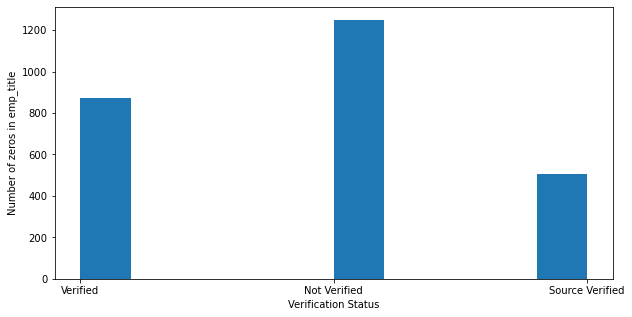

In [130]:
# Plotting the emp_title and verification status
plt.subplots(1,figsize=(10,5))
plt.hist(emp_title_zeros.verification_status)
plt.ylabel('Number of zeros in emp_title')
plt.xlabel('Verification Status');

In [131]:
emp_title_zeros.groupby('verification_status')['emp_title'].count().to_frame()

,emp_title
verification_status,
Not Verified,1249
Source Verified,506
Verified,871


- Based on the results above, the emp_title column is not dependent on verification_status.

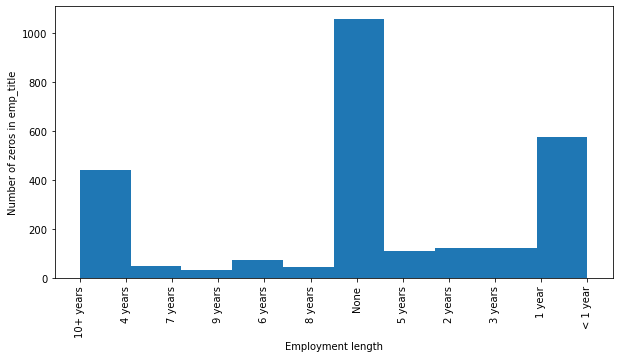

In [132]:
# Plotting null values in emp_title with emp_length
plt.subplots(1,figsize=(10,5))
plt.hist(emp_title_zeros.emp_length)
plt.xticks(rotation='vertical')
plt.ylabel('Number of zeros in emp_title')
plt.xlabel('Employment length');

In [133]:
emp_title_zeros.groupby('emp_length')['emp_title'].size().to_frame()

,emp_title
emp_length,
1 year,112
10+ years,358
2 years,123
3 years,121
4 years,82
5 years,109
6 years,74
7 years,51
8 years,46


- Based on the results above, 1055 out of 1112 loan applicants with missing employment length, did not provide  their employment title. Therefore, they could be unemployed. 
- The remaining 57 borrowers with filled employment title but no employment length inforamtion will be marked as  '< 1 year' experience. Next, 'None' value will be replaced by '< 1 year' in emp_length column).

In [134]:
# Replacing 'None' in 'emp_length'
for i in loan_data['emp_length']:
    if i == 'None':
        loan_data['emp_length'].replace(i, '< 1 year', inplace = True)
loan_data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534     < 1 year
42535    10+ years
Name: emp_length, Length: 42535, dtype: object

In [135]:
emp_len_updated = loan_data.groupby(['loan_status', 'emp_length']).size().reset_index(name= 'Count')
emp_len_updated

,loan_status,emp_length,Count
0,Charged Off,1 year,460
1,Charged Off,10+ years,1348
2,Charged Off,2 years,571
3,Charged Off,3 years,558
4,Charged Off,4 years,466
5,Charged Off,5 years,459
6,Charged Off,6 years,309
7,Charged Off,7 years,263
8,Charged Off,8 years,206
9,Charged Off,9 years,159


In [136]:
# Mapping strings values to integers in 'emp_length'
mapping_cols_dict = {"emp_length": {
    "10+ years": 10,
    "9 years": 9,
    "8 years": 8,
    "7 years": 7,
    "6 years": 6,
    "5 years": 5,
    "4 years": 4,
    "3 years": 3,
    "2 years": 2,
    "1 year": 1,
    "< 1 year": 0,
    "N/A": 0},
}

loan_data = loan_data.replace(mapping_cols_dict)
loan_data[['emp_length']].head()

,emp_length
0,10
1,0
2,10
3,10
4,1


In [137]:
# Investigating again null values
missing_values_dataset(loan_data)

Dataset has 36 columns. 
Among them 14 columns contain missing values.


,Missing Values,% of Total Values,type
desc,13293,31.25,object
pub_rec_bankruptcies,1365,3.21,float64
revol_util,90,0.21,object
last_pymnt_d,83,0.20,object
delinq_2yrs,29,0.07,float64
earliest_cr_line,29,0.07,object
inq_last_6mths,29,0.07,float64
open_acc,29,0.07,float64
pub_rec,29,0.07,float64
total_acc,29,0.07,float64


- Based on the table above, 7 columns are with 29 missing values. It is possible that they are the same rows.

In [138]:
missing_value_same_rows = loan_data[loan_data['delinq_2yrs'].isnull()]
missing_value_same_rows.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
42450,5000.0,5000.0,36 months,155.38,A,A2,0,0,NONE,NaN,...,NaN,NaN,Aug-2010,157.31,May-2007,804.0,800.0,NaN,NaN,N
42451,7000.0,7000.0,36 months,218.55,A,A3,0,0,NONE,NaN,...,NaN,NaN,Aug-2010,220.03,May-2007,804.0,800.0,NaN,NaN,N
42460,4350.0,4350.0,36 months,136.45,A,A4,0,0,RENT,120000.0,...,NaN,NaN,Aug-2010,139.93,NaN,0.0,0.0,NaN,NaN,N
42473,3900.0,3900.0,36 months,124.62,B,B3,0,0,RENT,98000.0,...,NaN,NaN,Aug-2010,126.06,May-2007,709.0,705.0,NaN,NaN,N
42481,6700.0,6700.0,36 months,209.18,A,A3,0,0,NONE,NaN,...,NaN,NaN,Jul-2010,209.89,May-2007,804.0,800.0,NaN,NaN,N


In [139]:
missing_value_same_rows.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,29.0,3903.448276,2381.895293,1000.00,2000.00,3200.00,5000.00,10500.00
funded_amnt,29.0,3830.172414,2308.412210,1000.00,2000.00,3200.00,5000.00,10500.00
installment,29.0,122.277586,74.266853,30.94,64.50,103.20,164.23,344.87
emp_length,29.0,1.931034,3.453063,0.00,0.00,0.00,2.00,10.00
annual_inc,25.0,71204.960000,65919.884823,6000.00,28000.00,50000.00,98000.00,300000.00
dti,29.0,7.746897,4.604633,0.39,4.00,10.00,10.00,19.50
delinq_2yrs,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico_range_low,29.0,724.137931,43.998153,640.00,695.00,710.00,755.00,800.00
fico_range_high,29.0,728.137931,43.998153,644.00,699.00,714.00,759.00,804.00
inq_last_6mths,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
loan_data[loan_data['earliest_cr_line'].isnull()]

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
42450,5000.0,5000.0,36 months,155.38,A,A2,0,0,NONE,NaN,...,NaN,NaN,Aug-2010,157.31,May-2007,804.0,800.0,NaN,NaN,N
42451,7000.0,7000.0,36 months,218.55,A,A3,0,0,NONE,NaN,...,NaN,NaN,Aug-2010,220.03,May-2007,804.0,800.0,NaN,NaN,N
42460,4350.0,4350.0,36 months,136.45,A,A4,0,0,RENT,120000.0,...,NaN,NaN,Aug-2010,139.93,NaN,0.0,0.0,NaN,NaN,N
42473,3900.0,3900.0,36 months,124.62,B,B3,0,0,RENT,98000.0,...,NaN,NaN,Aug-2010,126.06,May-2007,709.0,705.0,NaN,NaN,N
42481,6700.0,6700.0,36 months,209.18,A,A3,0,0,NONE,NaN,...,NaN,NaN,Jul-2010,209.89,May-2007,804.0,800.0,NaN,NaN,N
42484,3200.0,3200.0,36 months,103.20,B,B5,0,0,MORTGAGE,150000.0,...,NaN,NaN,Feb-2009,1733.32,Aug-2018,694.0,690.0,NaN,NaN,N
42495,7200.0,5075.0,36 months,164.42,C,C1,0,0,RENT,95000.0,...,NaN,NaN,Jul-2010,168.44,May-2007,704.0,700.0,NaN,NaN,N
42510,1900.0,1900.0,36 months,61.00,B,B4,Scheduall,1,MORTGAGE,100000.0,...,NaN,NaN,Feb-2008,0.00,May-2007,709.0,705.0,NaN,NaN,N
42515,1200.0,1200.0,36 months,38.17,B,B2,Classic Components,0,RENT,36000.0,...,NaN,NaN,Jul-2010,39.05,Aug-2018,659.0,655.0,NaN,NaN,N
42516,5000.0,5000.0,36 months,164.23,C,C4,Compensation Solutions,0,RENT,28000.0,...,NaN,NaN,Apr-2010,149.43,Jan-2017,614.0,610.0,NaN,NaN,N


- Based on the table above, it is confirmed that 7 columns have the same rows with 29 missing values. They will be kept in dataset and missing values will be filled with 0 whenever possible.

In [141]:
# Filling NaN with zeros in 7 columns with 29 missing values
loan_data.fillna({'delinq_2yrs': 0, 'earliest_cr_line': loan_data['issue_d'], 'inq_last_6mths': 0, 'open_acc': 0, 'pub_rec': 0, 'total_acc': 0, 'delinq_amnt': 0}, inplace = True)
loan_data.tail()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
42531,3500.0,3500.0,36 months,113.39,C,C1,0,0,RENT,180000.0,...,NaN,0.0,Mar-2008,0.00,Feb-2013,819.0,815.0,0.0,NaN,N
42532,1000.0,1000.0,36 months,32.11,B,B4,Halping hands company inc.,0,RENT,12000.0,...,NaN,0.0,Jun-2010,32.41,Sep-2014,784.0,780.0,0.0,NaN,N
42533,2525.0,2525.0,36 months,80.69,B,B3,0,0,RENT,110000.0,...,NaN,0.0,Jun-2010,82.03,May-2007,714.0,710.0,0.0,NaN,N
42534,6500.0,6500.0,36 months,204.84,A,A5,0,0,NONE,NaN,...,NaN,0.0,Jun-2010,205.32,Aug-2007,724.0,720.0,0.0,NaN,N
42535,5000.0,5000.0,36 months,156.11,A,A3,Homemaker,10,MORTGAGE,70000.0,...,NaN,0.0,Jun-2010,156.39,Feb-2015,794.0,790.0,0.0,NaN,N


In [142]:
# Investigating again null values
missing_values_dataset(loan_data)

Dataset has 36 columns. 
Among them 7 columns contain missing values.


,Missing Values,% of Total Values,type
desc,13293,31.25,object
pub_rec_bankruptcies,1365,3.21,float64
revol_util,90,0.21,object
last_pymnt_d,83,0.20,object
title,13,0.03,object
annual_inc,4,0.01,float64
last_credit_pull_d,4,0.01,object


- Missing data in 'desc', 'pub_rec_bankruptcies', 'title' and 'annual_inc' columns will be filled with zeros due to column importance.

- NaN's in 'revol_util' column will be replaced with mode values.
- NaN's in 'last_credit_pull_d' will be replaced with the latest payment date.

In [143]:
# Filling NaN's
loan_data.fillna({'desc': 0, 'pub_rec_bankruptcies': 0, 'title': 0, 'annual_inc': 0}, inplace = True)
loan_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,5000.0,36 months,162.87,B,B2,0,10,RENT,24000.0,...,83.7%,9.0,Jan-2015,171.62,Aug-2018,739.0,735.0,0.0,0.0,N
1,2500.0,2500.0,60 months,59.83,C,C4,Ryder,0,RENT,30000.0,...,9.4%,4.0,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,0.0,N
2,2400.0,2400.0,36 months,84.33,C,C5,0,10,RENT,12252.0,...,98.5%,10.0,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,0.0,N
3,10000.0,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,21%,37.0,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,0.0,N
4,3000.0,3000.0,60 months,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,53.9%,38.0,Jan-2017,67.30,Apr-2018,684.0,680.0,0.0,0.0,N


In [144]:
# Filling NaN's in 'revol_util' with mode
loan_data['revol_util'].fillna(loan_data['revol_util'].mode()[0], inplace=True)
loan_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,5000.0,36 months,162.87,B,B2,0,10,RENT,24000.0,...,83.7%,9.0,Jan-2015,171.62,Aug-2018,739.0,735.0,0.0,0.0,N
1,2500.0,2500.0,60 months,59.83,C,C4,Ryder,0,RENT,30000.0,...,9.4%,4.0,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,0.0,N
2,2400.0,2400.0,36 months,84.33,C,C5,0,10,RENT,12252.0,...,98.5%,10.0,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,0.0,N
3,10000.0,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,21%,37.0,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,0.0,N
4,3000.0,3000.0,60 months,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,53.9%,38.0,Jan-2017,67.30,Apr-2018,684.0,680.0,0.0,0.0,N


In [145]:
# Investigating again null values
missing_values_dataset(loan_data)

Dataset has 36 columns. 
Among them 2 columns contain missing values.


,Missing Values,% of Total Values,type
last_pymnt_d,83,0.20,object
last_credit_pull_d,4,0.01,object


In [146]:
# Filling NaN's in 'last_credit_pull_d' with the latest payment date
loan_data.last_credit_pull_d.fillna(loan_data.last_pymnt_d, inplace=True)
loan_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,5000.0,36 months,162.87,B,B2,0,10,RENT,24000.0,...,83.7%,9.0,Jan-2015,171.62,Aug-2018,739.0,735.0,0.0,0.0,N
1,2500.0,2500.0,60 months,59.83,C,C4,Ryder,0,RENT,30000.0,...,9.4%,4.0,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,0.0,N
2,2400.0,2400.0,36 months,84.33,C,C5,0,10,RENT,12252.0,...,98.5%,10.0,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,0.0,N
3,10000.0,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,21%,37.0,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,0.0,N
4,3000.0,3000.0,60 months,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,53.9%,38.0,Jan-2017,67.30,Apr-2018,684.0,680.0,0.0,0.0,N


In [147]:
# Investigating again null values
missing_values_dataset(loan_data)

Dataset has 36 columns. 
Among them 1 columns contain missing values.


,Missing Values,% of Total Values,type
last_pymnt_d,83,0.2,object


In [148]:
# Investigating if 83 missing values in 'last_pymnt_d' columns are coming from the 'Charged Off' loans
miss_last_pymnt = loan_data[loan_data['last_pymnt_d'].isnull()]
miss_last_pymnt.groupby('loan_status')[['loan_amnt']].count()

,loan_amnt
loan_status,
Charged Off,71
Does not meet the credit policy. Status:Charged Off,12


- Based on the above, all 83 missing values in 'last_pymnt_d' column are coming from the 'Charged Off' loans. This column is not important for the analysis, therefore it will be removed from the dataset.

In [149]:
# Dropping 'last_pymnt_d' column
loan_data.drop('last_pymnt_d', axis=1, inplace=True)

In [150]:
loan_data.shape

(42535, 35)

#### Converting datetime features

In [151]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'])

In [152]:
loan_data.dtypes

loan_amnt                      float64
funded_amnt                    float64
term                            object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
desc                            object
purpose                         object
title                           object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line        datetime64[ns]
fico_range_low                 float64
fico_range_high                float64
inq_last_6mths                 float64
open_acc                       float64
pub_rec                        float64
revol_bal                

#### Remove percentage values and strings/characters

In [153]:
# Remove percentage values
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float') / 100.0
loan_data['revol_util']

0        0.837
1        0.094
2        0.985
3        0.210
4        0.539
         ...  
42531    0.000
42532    0.000
42533    0.000
42534    0.000
42535    0.000
Name: revol_util, Length: 42535, dtype: float64

In [154]:
# Converting ' 36 months' to 36, ' 60 months' to 60 in 'term'
mapping_dictionary = {"term":{ " 36 months": 36, " 60 months": 60}}
loan_data = loan_data.replace(mapping_dictionary)

#### Investigating Loan_status column

In [155]:
# Count unique loan status
loan_data['loan_status'].value_counts().to_frame().reset_index()

,index,loan_status
0,Fully Paid,34116
1,Charged Off,5670
2,Does not meet the credit policy. Status:Fully ...,1988
3,Does not meet the credit policy. Status:Charge...,761


- They are 4 loan statuses: Fully Paid, Charged Off and Fully Paid as well as Charged Off that does not meet the credit policy.

- I am intrested to predict if loan will be Fully Paid or Charged Off (binary classification). Therefore, I will combine the status "'Does not meet the credit policy'. Status: Fully Paid" with 'Fully Paid' status and "'Does not meet the credit policy'. Status: Charged Off" with 'Charged Off' status.

In [156]:
# Updating loan_status into Fully Paid and Charged Off only
credit_policy = loan_data['loan_status'].str.split(':',1, expand=True).rename(columns = {0: 'loan_status', 1: 'credit_policy'})
credit_policy.head()

,loan_status,credit_policy
0,Fully Paid,None
1,Charged Off,None
2,Fully Paid,None
3,Fully Paid,None
4,Fully Paid,None


In [157]:
loan_data = pd.merge(loan_data, credit_policy, right_index = True, left_index = True)
loan_data.credit_policy.fillna(1, inplace = True)
loan_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag,loan_status_y,credit_policy
0,5000.0,5000.0,36,162.87,B,B2,0,10,RENT,24000.0,...,9.0,171.62,2018-08-01,739.0,735.0,0.0,0.0,N,Fully Paid,1
1,2500.0,2500.0,60,59.83,C,C4,Ryder,0,RENT,30000.0,...,4.0,119.66,2016-10-01,499.0,0.0,0.0,0.0,N,Charged Off,1
2,2400.0,2400.0,36,84.33,C,C5,0,10,RENT,12252.0,...,10.0,649.91,2017-06-01,739.0,735.0,0.0,0.0,N,Fully Paid,1
3,10000.0,10000.0,36,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,37.0,357.48,2016-04-01,604.0,600.0,0.0,0.0,N,Fully Paid,1
4,3000.0,3000.0,60,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,38.0,67.30,2018-04-01,684.0,680.0,0.0,0.0,N,Fully Paid,1


In [158]:
loan_data['loan_status_y'].replace('Does not meet the credit policy. Status', loan_data['credit_policy'], inplace = True)

In [159]:
loan_data.head()

,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,debt_settlement_flag,loan_status_y,credit_policy
0,5000.0,5000.0,36,162.87,B,B2,0,10,RENT,24000.0,...,9.0,171.62,2018-08-01,739.0,735.0,0.0,0.0,N,Fully Paid,1
1,2500.0,2500.0,60,59.83,C,C4,Ryder,0,RENT,30000.0,...,4.0,119.66,2016-10-01,499.0,0.0,0.0,0.0,N,Charged Off,1
2,2400.0,2400.0,36,84.33,C,C5,0,10,RENT,12252.0,...,10.0,649.91,2017-06-01,739.0,735.0,0.0,0.0,N,Fully Paid,1
3,10000.0,10000.0,36,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,37.0,357.48,2016-04-01,604.0,600.0,0.0,0.0,N,Fully Paid,1
4,3000.0,3000.0,60,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,38.0,67.30,2018-04-01,684.0,680.0,0.0,0.0,N,Fully Paid,1


In [160]:
loan_data['loan_status_y'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [161]:
loan_data.credit_policy.replace('Charged Off', 0, inplace = True)
loan_data.credit_policy.replace('Fully Paid', 0, inplace = True)

In [162]:
loan_data['credit_policy'].unique()

array([1, 0])

In [163]:
loan_data.rename(columns={'loan_status_y': 'loan_status'}, inplace = True)

In [164]:
loan_data.drop('loan_status_x', axis = 1, inplace = True)

In [165]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'delinq_amnt', 'pub_rec_bankruptcies', 'debt_settlement_flag',
       'loan_status', 'credit_policy'],
      dtype='object')

In [166]:
# Count again unique loan status
loan_data['loan_status'].value_counts().to_frame().reset_index()

,index,loan_status
0,Fully Paid,36104
1,Charged Off,6431


In [167]:
loan_data['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.848807
Charged Off    0.151193
Name: loan_status, dtype: float64

- They are 85% (~36,000) 'Fully Paid' loans and 15% (6,400) 'Charged Off' loans. Data are imblanaced and this observation will be considered in further analysis.

Text(0.5, 1.0, 'Percentage of each Loan Status')

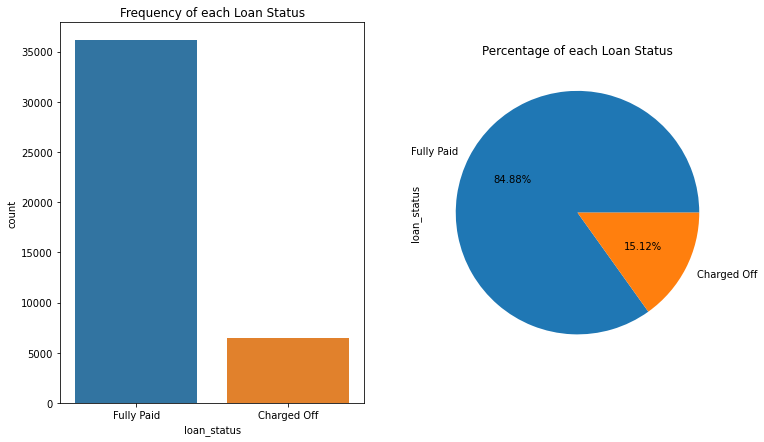

In [168]:
# Countplot of loan_status
fig, axs = plt.subplots(1,2,figsize=(12,7))
sns.countplot(x='loan_status',data=loan_data,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_data.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan Status")

#### Investigating FICO Score columns
- FICO scores are a credit score: a number used by banks and credit cards to represent how credit-worthy a person is. 

There are 4 columns related to FICO score in dataset: 'fico_range_low', 'fico_range_high', 'last_fico_range_low', and 'last_fico_range_high'.

FICO gives a lower and upper limit of the range that the borrowers score belongs to, and these values are stored as 'fico_range_low' and 'fico_range_high'. Afterwards, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high. Based on this information, 'last_fico_range_low' and 'last_fico_range_high' will not be used in the analyis, as these values can be updated by the Lending Club after application. 

Therefore, I will focus only on 'fico_range_low' and 'fico_range_high' columns.

In [169]:
print(loan_data['fico_range_low'].unique())
print(loan_data['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625. 650. 655. 645. 640. 635. 610.
 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629. 654. 659. 649. 644. 639. 614.
 624. 619.]


Number of rows in dataset:  42535


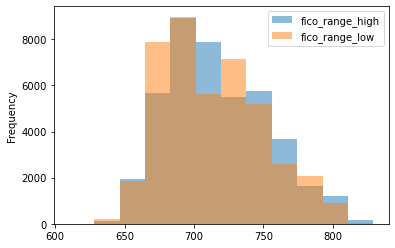

In [170]:
fico_columns = ['fico_range_high','fico_range_low']
print("Number of rows in dataset: ", loan_data.shape[0])
loan_data.dropna(subset=fico_columns,inplace=True)
loan_data[fico_columns].plot.hist(bins=12, alpha = 0.5);

- Values in FICO range low and FICO range high are comparable, thus, FICO score average will be calculated.

In [171]:
# Calculating the fico score average 
loan_data['fico_average'] = (loan_data['fico_range_high'] + loan_data['fico_range_low']) / 2
fico_cols = ['fico_range_low','fico_range_high','fico_average']
loan_data[fico_cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [172]:
# Drop redundant fico score columns 
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loan_data = loan_data.drop(drop_cols, axis=1)

In [173]:
# Introducing the FICO Score rating which describes the credibility of borrowers
'''
fico_scores = 'Exceptional': 800,
                'Very Good': 740,
                'Good': 670, 
                'Fair': 580, 
                'Poor': 300}
'''

"\nfico_scores = 'Exceptional': 800,\n                'Very Good': 740,\n                'Good': 670, \n                'Fair': 580, \n                'Poor': 300}\n"

In [174]:
def fico_scores(row):
    if row > 800:
        return 'Exceptional'
    elif row in range (740, 799):
            return 'Very Good'
    elif row in range (670, 739):
            return 'Good'
    elif row in range (580, 669):
            return 'Fair'
    else:
        row < 580
        return 'Poor'

loan_data_with_fico = loan_data['FICO_Score_group'] = loan_data['fico_average'].apply(lambda row: fico_scores(row))   
loan_data_with_fico.head()

0         Good
1    Very Good
2         Good
3         Good
4         Good
Name: fico_average, dtype: object

In [175]:
loan_data.shape

(42535, 34)

In [176]:
# Qucik look into loan data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42535
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             42535 non-null  float64       
 1   funded_amnt           42535 non-null  float64       
 2   term                  42535 non-null  int64         
 3   installment           42535 non-null  float64       
 4   grade                 42535 non-null  object        
 5   sub_grade             42535 non-null  object        
 6   emp_title             42535 non-null  object        
 7   emp_length            42535 non-null  int64         
 8   home_ownership        42535 non-null  object        
 9   annual_inc            42535 non-null  float64       
 10  verification_status   42535 non-null  object        
 11  issue_d               42535 non-null  datetime64[ns]
 12  desc                  42535 non-null  object        
 13  purpose         

In [177]:
# Export filtered loan_data into .csv
# Save file as csv
exported_data = loan_data.to_csv('./filtered_part_1_Loan_data.csv', index = False)